In [89]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
train_df = pd.read_csv('/kaggle/input/newdataset/Arjun_Bowlers_dataset - Sheet1 (2).csv')

In [ ]:
train_df.columns

In [ ]:
train_df.describe()

In [3]:
train_df.dtypes[train_df.dtypes != 'object']

run_up_speed              float64
impulse_stride_length     float64
is_contact_time           float64
com_disp                  float64
bfc_contact_time          float64
front_knee_flexion          int64
trunk_flexion               int64
arm_speed                 float64
ffc_contact_time          float64
delivery_stride_length    float64
is_flight_time            float64
Bowling Speed (Kmph)      float64
dtype: object

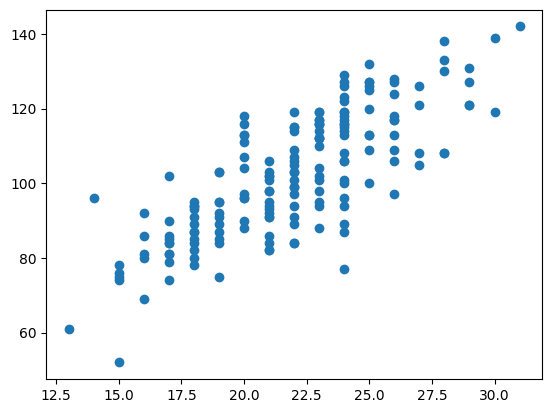

In [4]:
plt.scatter(x='run_up_speed', y='Bowling Speed (Kmph)', data=train_df)

In [ ]:
train_df.query('run_up_speed <15')
#UK Group 1 Bowler 2

In [ ]:
plt.scatter(x='impulse_stride_length', y='Bowling Speed (Kmph)', data=train_df)

In [ ]:
train_df.query('impulse_stride_length < 50')
#London Academy: Bowler 26

In [ ]:
plt.scatter(x='is_contact_time', y='Bowling Speed (Kmph)', data=train_df)

In [ ]:
train_df.query('is_contact_time > 180')
# London Academy: Bowler 53
# Non HD 1


In [ ]:
plt.scatter(x='com_disp', y='Bowling Speed (Kmph)', data=train_df)

In [ ]:
train_df.query('com_disp > 11 & com_disp < 14')

In [ ]:
plt.scatter(x='bfc_contact_time', y='Bowling Speed (Kmph)', data=train_df)

In [ ]:
train_df.query('bfc_contact_time > 300 & bfc_contact_time < 350')

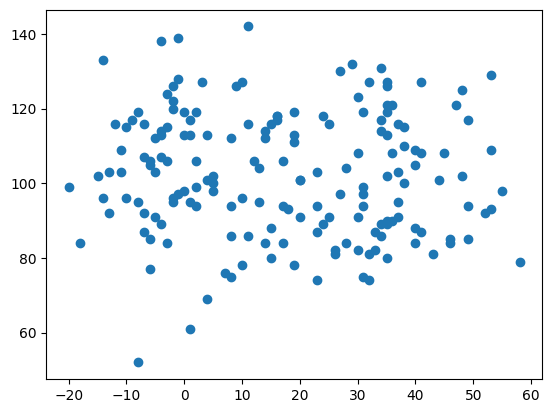

In [5]:
plt.scatter(x='front_knee_flexion', y='Bowling Speed (Kmph)', data=train_df)

In [13]:
train_df.query('front_knee_flexion >-15 & front_knee_flexion<5')
#HD 3, HD 11


,athlete_name,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
0,HD 1,25.0,162.0,142.0,7.0,217.0,3,41,263.0,467.0,127.0,196.0,127.0
2,HD 3,28.0,228.0,142.0,7.0,162.0,-4,47,335.0,317.0,129.0,279.0,138.0
4,HD 5,28.0,143.0,146.0,8.0,233.0,-14,40,285.0,362.0,146.0,163.0,133.0
10,HD 11,30.0,269.0,162.0,21.0,225.0,-1,44,275.0,417.0,139.0,254.0,139.0
13,HD 14,20.0,160.0,242.0,19.0,317.0,-10,37,249.0,580.0,102.0,171.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Ishaan Patel,24.0,152.0,138.0,5.0,271.0,-9,31,253.0,333.0,131.0,125.0,117.0
172,Kajus Syed,20.0,135.0,150.0,9.0,242.0,-4,42,309.0,333.0,111.0,159.0,113.0
173,Keiran Catherell,23.0,198.0,163.0,8.0,271.0,-12,29,276.0,496.0,122.0,200.0,116.0
174,Ned Ballantyne,16.0,143.0,171.0,9.0,229.0,-13,40,254.0,383.0,102.0,179.0,92.0


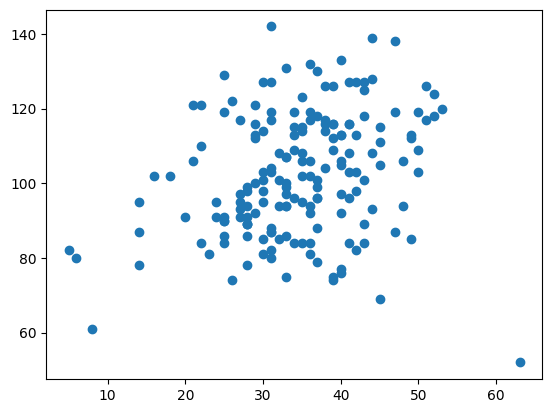

In [14]:
plt.scatter(x='trunk_flexion', y='Bowling Speed (Kmph)', data=train_df)

In [15]:
train_df.query('trunk_flexion < 10')
#London Academy: Bowler 8, London Academy: Bowler 36

,athlete_name,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
53,London Academy: Bowler 1,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
60,London Academy: Bowler 8,18.0,178.0,150.0,11.0,187.0,15,6,214.0,288.0,81.0,241.0,80.0
78,London Academy: Bowler 26,13.0,39.0,208.0,3.0,328.0,1,8,198.0,517.0,67.0,86.0,61.0
80,London Academy: Bowler 28,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
81,London Academy: Bowler 29,18.0,177.0,188.0,22.0,192.0,0,0,NaN,NaN,82.0,291.0,NaN
85,London Academy: Bowler 33,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
88,London Academy: Bowler 36,18.0,141.0,133.0,16.0,158.0,33,5,211.0,336.0,78.0,229.0,82.0
96,London Academy: Bowler 44,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.scatter(x='arm_speed', y='Bowling Speed (Kmph)', data=train_df)

In [ ]:
plt.scatter(x='ffc_contact_time', y='Bowling Speed (Kmph)', data=train_df)

In [ ]:
plt.scatter(x='delivery_stride_length', y='Bowling Speed (Kmph)', data=train_df)

In [ ]:
plt.scatter(x='is_flight_time', y='Bowling Speed (Kmph)', data=train_df)

In [16]:
values = ['UK Group 1 Bowler 2', 'London Academy: Bowler 26', ' London Academy: Bowler 53',
'Non HD 1', 'HD 3', 'HD 11', 'London Academy: Bowler 8', 'London Academy: Bowler 36']

In [17]:
train_df = train_df[train_df.athlete_name.isin(values) == False]

In [18]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
ffc_contact_time,7
is_contact_time,6
arm_speed,6
Bowling Speed (Kmph),6
run_up_speed,5
impulse_stride_length,5
com_disp,5
bfc_contact_time,5
is_flight_time,5
delivery_stride_length,4


In [ ]:
sns.histplot(
    train_df,
    x=train_df['Bowling Speed (Kmph)']
)

In [19]:
train_df['Bowling Speed (Kmph)'] = np.log1p(train_df['Bowling Speed (Kmph)'])


<ipython-input-19-9ddd9fb72585>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Bowling Speed (Kmph)'] = np.log1p(train_df['Bowling Speed (Kmph)'])


In [ ]:
sns.histplot(
    train_df,
    x=train_df['Bowling Speed (Kmph)']
)


<ipython-input-20-df35bcb398ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ffc_contact_time'].fillna(0, inplace=True)
<ipython-input-20-df35bcb398ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['is_contact_time'].fillna(0, inplace=True)
<ipython-input-20-df35bcb398ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['arm_speed'].fillna(0, inplace=True)
<ipython-input-20-df35bcb398ea>:8: SettingWit

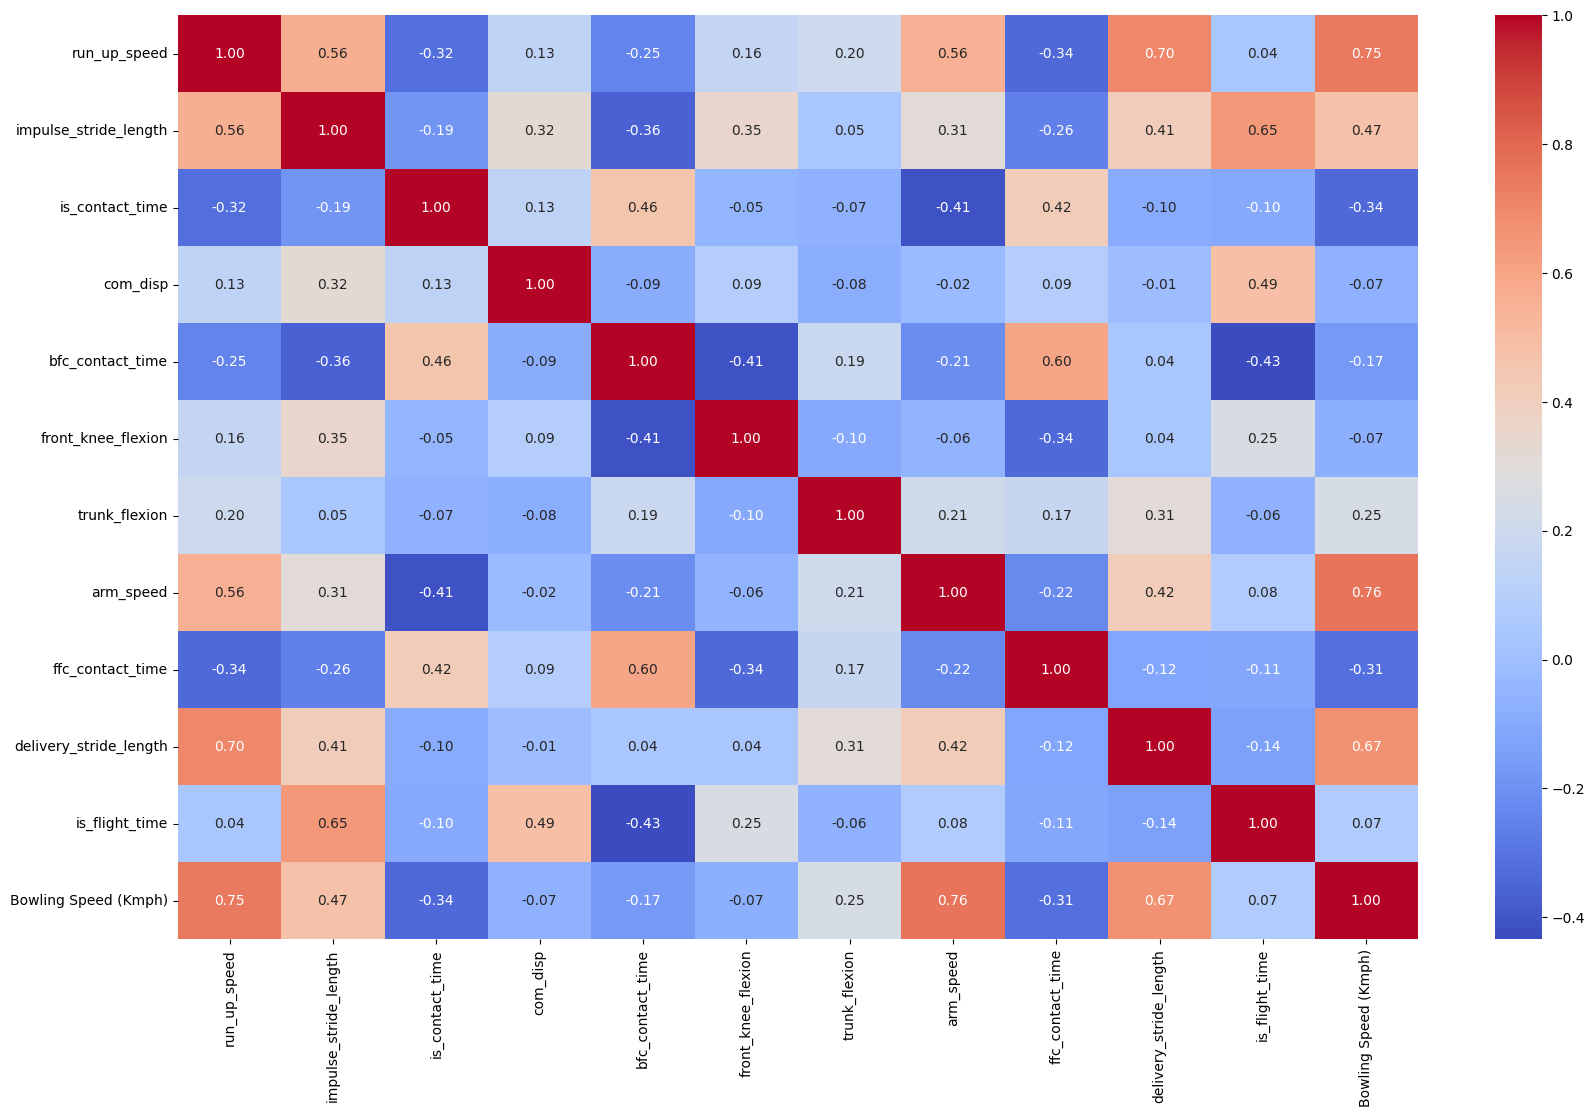

In [20]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

train_df['ffc_contact_time'].fillna(0, inplace=True)
train_df['is_contact_time'].fillna(0, inplace=True)
train_df['arm_speed'].fillna(0, inplace=True)
train_df['Bowling Speed (Kmph)'].fillna(0, inplace=True)
train_df['run_up_speed'].fillna(0, inplace=True)
train_df['impulse_stride_length'].fillna(0, inplace=True)
train_df['com_disp'].fillna(0, inplace=True)
train_df['bfc_contact_time'].fillna(0, inplace=True)
train_df['is_flight_time'].fillna(0, inplace=True)
train_df['delivery_stride_length'].fillna(0, inplace=True)

train_df = train_df.drop(columns = 'athlete_name')



In [21]:
X = train_df.drop(columns=['Bowling Speed (Kmph)'])
y = train_df['Bowling Speed (Kmph)'] 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((138, 11), (35, 11), (138,), (35,))

In [25]:
#LINEAR REGRESSION MODEL
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred_lr = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_lr))

0.26267817888868245

In [81]:
r2_score(y_test, y_pred_lr)

-2.3102003666967494

In [42]:
#Random Forest Regressor
RFR = RandomForestRegressor(random_state=13)
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [43]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [82]:
y_pred_rfr = rfr_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_rfr))

0.09002370522225198

In [83]:
r2_score(y_test, y_pred_rfr)

0.6112055501811244

In [30]:
#still have to figure out how to use coef for StackingRegressor, so I did it for Random Forest for now...
best_rf = rfr_cv.best_estimator_
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(coefficients)

                   Feature  Importance
7                arm_speed    0.563331
8         ffc_contact_time    0.156717
6            trunk_flexion    0.135653
4         bfc_contact_time    0.078520
9   delivery_stride_length    0.026146
1    impulse_stride_length    0.010498
10          is_flight_time    0.009951
2          is_contact_time    0.009932
0             run_up_speed    0.007997
5       front_knee_flexion    0.000652
3                 com_disp    0.000603


In [39]:
#XGB Regressor
XGB = XGBRegressor(random_state=13)
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [40]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [84]:
y_pred_xgb = xgb_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_xgb))

0.33854264996297084

In [85]:
r2_score(y_test, y_pred_xgb)

-4.49835868632641

In [45]:
#Ridge Regression
ridge = Ridge()

In [46]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [47]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [48]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [86]:
y_pred_ridge = ridge_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_ridge))

0.26236604754875553

In [87]:
r2_score(y_test, y_pred_ridge)

-2.3023382487836175

In [90]:
#Lasso Regression
lasso = Lasso()

In [94]:
param_grid_lasso = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
}

In [95]:
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [96]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10]},
             scoring='neg_mean_squared_error')

In [97]:
y_pred_lasso = lasso_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_lasso))

0.2502281777862133

In [98]:
r2_score(y_test, y_pred_lasso)

-2.003853275930497

In [50]:
#Gradient Boosting Regressor
GBR = GradientBoostingRegressor()

In [56]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [57]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [58]:
GBR_cv.fit(X_train, y_train)
#not the best

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [99]:
y_pred_GBR = GBR_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_GBR))

0.29177630122205717

In [100]:
r2_score(y_test, y_pred_GBR)

-3.0841935778471745

In [60]:
#Cat Boost Regressor
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [61]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [62]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [63]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7968304c55a0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [101]:
y_pred_cat = cat_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_cat))

0.11987411636728292

In [102]:
r2_score(y_test, y_pred_cat)

0.3106224651020585

In [ ]:
#LR - RMSE: 0.263, R^2: -2.31
#RFR - RMSE: 0.09, R^2: 0.611
#XGBR - RMSE: 0.339, R^2: -4.498
#RR - RMSE: 0.262, R^2: -2.302
#LaR - RMSE: 0.25, R^2: -2.004
#GBR - RMSE: 0.292, R^2: -3.084
#CBR - RMSE: 0.12, R^2: 0.311

#Best Model so far - Random Forest Regressor

In [236]:
#Voting Regressor
vr = VotingRegressor([('cat', cat_cv.best_estimator_),
                      ('rfr', rfr_cv.best_estimator_)],
                    weights=[1, 100000000000])

In [237]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('cat',
                             <catboost.core.CatBoostRegressor object at 0x796803d8a6b0>),
                            ('rfr',
                             RandomForestRegressor(max_depth=10,
                                                   min_samples_split=3,
                                                   random_state=13))],
                weights=[1, 100000000000])

In [238]:
y_pred_vr = vr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_vr))

0.09002370522226126

In [183]:
r2_score(y_test, y_pred_vr)

0.6080514190057573

In [ ]:
#VR - RMSE: 0.900, R^2: 0.608

In [227]:
estimators = [
    ('xgb', xgb_cv.best_estimator_),
    ('ridge', ridge_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [229]:
#Stacking Regressor
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = rfr_cv
)

In [230]:
stackreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.2,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate...
                                            random_state=13, ...)),
                              ('ridge', Ridge(alpha=10, solver='sag')),
                              ('rfr',
                               RandomForestRegressor(max_depth=10,
                                                     min_samples_split=3,
                                                     random_state=13))],
                  final_estimator=GridSearchCV(cv=5,
                                               estimator=RandomForestRegressor(random_state=13),
                                               n_jobs=-1,
                                               param_grid={'max_depth': [5, 10,
                                                                         15],
                                                           'min_samples_split': [3,
                                                                                 5,
                                                                                 10],
                                                           'n_estimators': [100,
                                                                            250,
                                                                            500]},
                                               scoring='neg_mean_squared_error'))

In [231]:
y_pred_stack = stackreg.predict(X_test)

In [239]:
mean_squared_error(y_test, y_pred_stack, squared=False)
r2_score(y_test, y_pred_stack)

0.5989913996373348

In [78]:
#SR - RMSE: 0.091, R^2: 0.599
#BEST IS RANDOM FOREST REGRESSOR (alone I think)

AttributeError: 'StackingRegressor' object has no attribute 'weights_'